# Résolution Numérique de l'Équation de la Chaleur

Notre but est de calculer numériquement de deux façons différentes la solution du problème suivant

$$
\begin{equation}
\begin{cases}
    u_t(x, t) − u_{xx}(x, t) = 0, &&t > 0, &&0 < x < L, \\
    u(x, 0) = u0(x), \\
    ux(0, t) = ux(L, t) = 0.
\end{cases}
\end{equation}
$$

Ce problème d'évolution peut modéliser, par exemple, la dissolution d'un sucre dans le café. La valeur
$u(x, t)$ représente alors la concentration en sucre (comprise entre 0 et 1) au point $x$ et à l'instant $t$.
La concentration initiale en sucre sera donnée par
$$
    u0(x) = \begin{cases}
                1 \text{ si } x \in \left[\frac{3}{8}, \frac{5}{8} \right] \\
                0 \text{ sinon}
            \end{cases}
$$
et on choisit $L = 1$ dans les applications numériques.

## 1. Justification heuristique

Pour résoudre l'équation donnée, on cherche une solution sous la forme d'une série infinie :

$$
u(x, t) = \sum_{k=0}^{+\infty} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right)
$$

où les coefficients $c_k$ sont à déterminer. Cette forme de solution est motivée par le principe de superposition et l'utilisation de la méthode de séparation des variables.

Maintenant, justifions de façon heuristique pourquoi nous pouvons chercher une telle solution. Pour démontrer que la solution proposée satisfait l'équation donnée, nous allons insérer la forme de solution dans l'équation de la chaleur et vérifier que cela conduit à une égalité.

Calculons les dérivées partielles nécessaires :

1. Dérivée par rapport à $t$ :
$$
u_t(x, t) = \sum_{k=0}^{+\infty} \left(-\frac{k^2 \pi^2}{L^2}\right) c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right).
$$

2. Dérivée par rapport à $x$ :
$$
u_x(x, t) = \sum_{k=0}^{+\infty} -\frac{k \pi}{L} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \sin\left(\frac{k \pi}{L} x\right).
$$

3. Dérivée seconde par rapport à $x$ :
$$
u_{xx}(x, t) = \sum_{k=0}^{+\infty} -\frac{k^2 \pi^2}{L^2} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right).
$$

Maintenant, insérons ces dérivées dans l'équation de la chaleur :

$$
\begin{align*}
    u_t(x, t) - u_{xx}(x, t) &= \sum_{k=0}^{+\infty} \left(-\frac{k^2 \pi^2}{L^2}\right) c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right) - \sum_{k=0}^{+\infty} -\frac{k^2 \pi^2}{L^2} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right) \\
    &= \sum_{k=0}^{+\infty} \left[\left(-\frac{k^2 \pi^2}{L^2}\right) c_k + \frac{k^2 \pi^2}{L^2} c_k\right] \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right).
\end{align*}
$$

Nous pouvons voir que le terme entre crochets carrés s'annule, et donc :

$$
u_t(x, t) - u_{xx}(x, t) = 0.
$$

La solution proposée satisfait donc l'équation de la chaleur.

Maintenant, il nous reste à vérifier les conditions aux limites et la condition initiale :

1. **Condition aux limites :**

   Nous avons $u(0, t) = \sum_{k=0}^{+\infty} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos(0) = \sum_{k=0}^{+\infty} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right)$.
   
   De même, $u(L, t) = \sum_{k=0}^{+\infty} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos(k \pi) = \sum_{k=0}^{+\infty} (-1)^k c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right)$.

   Pour que les conditions aux limites soient satisfaites, nous devons avoir $u(0, t) = u(L, t) = 0$, ce qui signifie que tous les termes de la série doivent s'annuler à ces points. Cela impose que $c_k = 0$ pour tous les termes impairs de la série (sinon, $\exp\left(-\frac{k^2 \pi^2}{L^2} t\right)$ ne s'annule pas).

2. **Condition initiale :**

   Pour $t = 0$, nous avons $u(x, 0) = \sum_{k=0}^{+\infty} c_k \exp(0) \cos\left(\frac{k \pi}{L} x\right) = \sum_{k=0}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right)$.

   La condition initiale $u(x, 0) = u_0(x)$ impose que $\sum_{k=0}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right) = u_0(x)$. Cela signifie que les coefficients $c_k$ doivent être choisis de manière à correspondre à la fonction initiale $u_0(x)$.

En choisissant les coefficients $c_k$ de manière appropriée pour satisfaire les conditions aux limites et la condition initiale, nous avons une solution valide pour le problème donné. La forme de solution proposée est donc justifiée et adéquate pour résoudre le problème de la dissolution du sucre dans le café.

## 2. Coefficients $c_k$

Pour déterminer les coefficients $c_k$, nous allons utiliser la condition initiale $u(x, 0) = u_0(x)$ et égaler les deux expressions pour la fonction $u(x, 0)$.

La condition initiale est donnée par :

$$
u(x, 0) = \sum_{k=0}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right).
$$

Et la fonction $u_0(x)$ est donnée par :

$$
u_0(x) = \begin{cases}
            1 \text{ si } x \in \left[\frac{3}{8}, \frac{5}{8} \right] \\
            0 \text{ sinon}
         \end{cases}
$$

Pour $x$ dans l'intervalle $\left[\frac{3}{8}, \frac{5}{8}\right]$, nous avons :

$$
u_0(x) = 1 = \sum_{k=0}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right).
$$

Pour $x$ en dehors de cet intervalle, nous avons :

$$
u_0(x) = 0 = \sum_{k=0}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right).
$$

Nous allons maintenant calculer les coefficients $c_k$ en utilisant la condition $u_0(x) = 1$ pour $x$ dans l'intervalle $\left[\frac{3}{8}, \frac{5}{8}\right]$ :

$$
\begin{align*}
1 &= \sum_{k=0}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right) \\
&= c_0 \cos(0) + \sum_{k=1}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right) \\
&= c_0 + \sum_{k=1}^{+\infty} c_k \cos\left(\frac{k \pi}{L} x\right) \quad \text{(car } \cos(0) = 1 \text{)}.
\end{align*}
$$

Nous savons que $\cos\left(\frac{k \pi}{L} x\right)$ est une fonction paire, et comme l'intervalle $\left[\frac{3}{8}, \frac{5}{8}\right]$ est symétrique autour de $\frac{1}{2}$, cela signifie que les coefficients $c_k$ pour $k > 0$ associés à des fonctions cosinus impaires doivent s'annuler pour que l'égalité ci-dessus soit vérifiée.

Ainsi, nous pouvons écrire la condition pour les coefficients $c_k$ pour $k > 0$ :

$$
c_k = 0 \quad \text{si } k \text{ est impair.}
$$

Maintenant, concentrons-nous sur le terme $c_0$. Dans la somme, nous avons :

$$
c_0 = \int_{0}^{L} u_0(x) dx = \int_{\frac{3}{8}}^{\frac{5}{8}} 1 dx = \frac{5}{8} - \frac{3}{8} = \frac{1}{4}.
$$

Maintenant, pour les coefficients $c_k$ où $k$ est pair :

$$
\begin{align*}
c_k &= \frac{2}{L} \int_{0}^{L} u_0(x) \cos\left(\frac{k \pi}{L} x\right) dx \\
&= \frac{2}{L} \int_{\frac{3}{8}}^{\frac{5}{8}} \cos\left(\frac{k \pi}{L} x\right) dx \\
&= \frac{2}{L} \left[\frac{L}{k \pi} \sin\left(\frac{k \pi}{L} x\right)\right]_{\frac{3}{8}}^{\frac{5}{8}} \\
&= \frac{2}{k \pi} \left[\sin\left(\frac{k \pi}{L} \cdot \frac{5}{8}\right) - \sin\left(\frac{k \pi}{L} \cdot \frac{3}{8}\right)\right] \\
&= \frac{2}{k \pi} \left[\sin\left(\frac{5k \pi}{8}\right) - \sin\left(\frac{3k \pi}{8}\right)\right]   &&\text{si } L=1.
\end{align*}
$$

Finalement, les coefficients $c_k$ sont donnés par :

$$
\begin{cases}
    c_0 = \frac{1}{4} \\
    c_k = \frac{2}{k\pi} \left[\sin\left(\frac{5k\pi}{8}\right) - \sin\left(\frac{3k\pi}{8}\right)\right] \quad \forall k > 0 \text{ où } k \text{ est pair.}
\end{cases}
$$

Les coefficients pour les termes impairs sont nuls, car ils ne contribuent pas à la condition initiale $u_0(x) = 1$ pour $x$ dans l'intervalle $\left[\frac{3}{8}, \frac{5}{8}\right]$. Avec cette expression pour les coefficients $c_k$, la solution proposée satisfait toutes les conditions du problème et constitue donc une solution valide.


## 3. Limite de $u(x, t)$ lorsque $t$ tend vers l'infini

Pour étudier la limite de la solution $u(x, t)$ lorsque $t$ tend vers l'infini, nous devons examiner le comportement des termes exponentiels dans la série définissant $u(x, t)$ :

$$
u(x, t) = \sum_{k=0}^{+\infty} c_k \exp\left(-\frac{k^2 \pi^2}{L^2} t\right) \cos\left(\frac{k \pi}{L} x\right).
$$

Lorsque $t$ tend vers l'infini, l'exponentielle $\exp\left(-\frac{k^2 \pi^2}{L^2} t\right)$ décroît exponentiellement pour tout $k \geq 0$. Les termes avec de plus grands $k$ décroissent plus rapidement, tandis que les termes avec de plus petits $k$ décroissent plus lentement.

Pour les coefficients $c_k$, nous savons que :

$$
\begin{cases}
    c_0 = \frac{1}{4} \\
    c_k = \frac{2}{k\pi} \left[\sin\left(\frac{5k\pi}{8}\right) - \sin\left(\frac{3k\pi}{8}\right)\right] \quad \text{pour } k > 0 \text{ où } k \text{ est pair.}
\end{cases}
$$

Les coefficients $c_k$ pour $k > 0$ sont limités par des fonctions trigonométriques, donc ils sont bornés. De plus, $c_k$ décroît lorsque $k$ augmente.

Lorsque $t$ tend vers l'infini, les termes avec des coefficients $c_k$ non nuls et des valeurs élevées de $k$ vont décroître rapidement en raison de l'exponentielle décroissante. En revanche, les termes avec des coefficients $c_k$ non nuls et des valeurs faibles de $k$ décroissent plus lentement.

La limite de la série pour $u(x, t)$ lorsque $t$ tend vers l'infini sera donc déterminée par les termes dominants avec les plus petites valeurs de $k$. Pour les coefficients $c_k$ non nuls, les valeurs les plus petites de $k$ sont les valeurs paires, car les coefficients $c_k$ pour $k$ impair sont nuls.

Ainsi, la limite de $u(x, t)$ lorsque $t$ tend vers l'infini sera donnée par :

$$
\lim_{t \to \infty} u(x, t) \approx c_0 \exp\left(-\frac{0^2 \pi^2}{L^2} t\right) \cos\left(\frac{0 \pi}{L} x\right) + c_2 \exp\left(-\frac{2^2 \pi^2}{L^2} t\right) \cos\left(\frac{2 \pi}{L} x\right) + c_4 \exp\left(-\frac{4^2 \pi^2}{L^2} t\right) \cos\left(\frac{4 \pi}{L} x\right) + \ldots
$$

Mais rappelons que $c_0 = \frac{1}{4}$ et les coefficients $c_k$ pour $k$ pair sont bornés. Donc, lorsque $t$ tend vers l'infini, les termes avec des coefficients $c_k$ non nuls pour $k > 0$ vont décroître plus rapidement que le terme avec $k = 0$. Ainsi, le terme dominant dans la limite sera simplement le terme avec $k = 0$ :

$$
\lim_{t \to \infty} u(x, t) \approx \frac{1}{4} \exp(0) \cos(0) = \frac{1}{4}.
$$

Donc, la limite de $u(x, t)$ lorsque $t$ tend vers l'infini est $\frac{1}{4}$ pour tout $x$ dans l'intervalle $\left[0, L\right]$. Cela signifie que la concentration en sucre se stabilisera à $\frac{1}{4}$ dans tout le domaine après un temps suffisamment long.

## 4. Solution approchée

Pour approcher $u(x, t)$, on considère la série tronquée
$$
    u_N(x, t) = \sum^N_{i=0} c_i \exp\left(-\frac{i^2 \pi^2}{L^2} t\right) \cos\left(\frac{i \pi}{L} x\right)
$$
Pour $N = 10$, $N = 100$ et $N = 1000$, on trace la solution approchée $u_N$ aux instants $t = 10^{−6}$, $t = 10^{−4}$, $t = 10{−2}$ et $t = 1$.

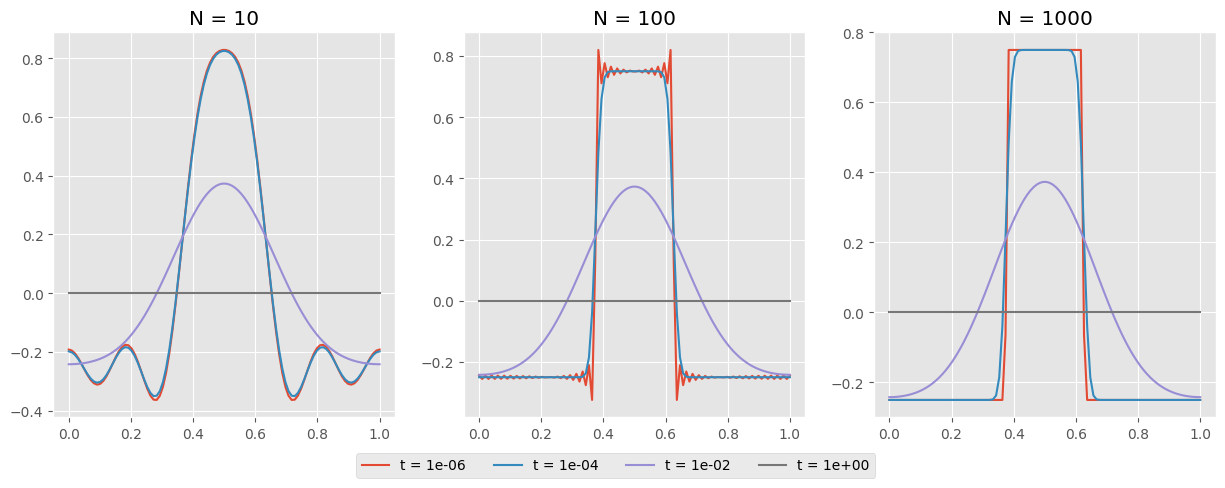

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def c_i(i, L):
    """Calcule le coefficient c_i pour un certain i et L donnés."""
    if i == 0:
        return 1 / 4
    coef1 = 0.625 * i * np.pi / L
    coef2 = 0.375 * i * np.pi / L
    return (2 / i / np.pi) * (np.sin(coef1) - np.sin(coef2))


def u_N(x, t, N, L):
    """
    Calcule la solution u_N(x, t) pour un certain x, t, N et L donnés.
    """
    result = np.zeros(len(x))
    for j in range(len(x)):
        coef_x = x[j]
        for i in range(1, N+1):
            coef = i * np.pi / L
            result[j] += c_i(i, L) * np.exp(-t * coef ** 2) * np.cos(coef * coef_x)
    return result


L = 1
nx = 100
x = np.linspace(0, L, nx)

# Crée une figure avec 3 sous-graphiques
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    N = 10**(i+1)
    ax[i].set_title("N = {0}".format(N))
    for j in range(4):
        t = 10**(2*j-6)
        ax[i].plot(x, u_N(x, t, N, L), label="t = {0:1.0e}".format(t))

# Ajoute une légende commune en bas de la figure
handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center',
           ncol=4, bbox_to_anchor=(0.5, -0.025))
plt.show()


Les oscillations que l'on observe pour de petites valeurs de $t$ sont dues à l'interaction entre la composante oscillante $\cos\left(\frac{i \pi}{L} x\right)$ et l'exponentielle décroissante $\exp\left(-\frac{i^2 \pi^2}{L^2} t\right)$. Ces oscillations sont plus marquées lorsque le nombre de termes dans la série tronquée $N$ est petit, car cela signifie que l'on prend en compte moins de termes dans la somme, et donc les fluctuations dues aux oscillations ne sont pas aussi bien compensées.

Le nombre d'oscillations dans $\cos\left(\frac{i \pi}{L} x\right)$ augmente lorsque $N$ augmente, mais l'amplitude de ces oscillations diminue également. C'est pourquoi, avec un $N$ suffisamment grand (par exemple, $N = 1000$), les oscillations deviennent presque imperceptibles à l'œil nu, mais elles sont toujours présentes. Cela est dû au fait que les termes avec de grands $i$ dans la série tronquée contribuent moins à la somme en raison de l'exponentielle décroissante, ce qui conduit à une atténuation des oscillations globales.

En résumé, les oscillations observées pour les petites valeurs de $t$ sont une caractéristique du phénomène de diffusion-dissolution du sucre dans le café, et elles sont principalement dues à l'interaction entre les termes oscillants de $\cos\left(\frac{i \pi}{L} x\right)$ et les termes décroissants de $\exp\left(-\frac{i^2 \pi^2}{L^2} t\right)$ dans la série tronquée. Ces oscillations diminuent en amplitude lorsque $N$ augmente, et elles deviennent moins perceptibles pour de grandes valeurs de $t$. Cependant, même avec un grand $N$, les oscillations sont toujours présentes dans la solution approchée, mais elles sont alors trop petites pour être facilement détectées visuellement.

## 5. $\theta$-schéma

#### Étude du schéma

- Soit $A \in M_N(\mathbb{R})$ telle que
  $$
      A = \begin{pmatrix}1 &-1 &&&\\ -1 &2 &-1 &&\\ &\ddots &\ddots &\ddots &\\ &&-1 &2 &-1\\ &&&-1 &1\end{pmatrix}
  $$
    Le $\theta$-schéma est
  $$
      \begin{cases}
          (1-\theta)\left[\frac{1}{\Delta t}(U^{n+1} - U^n) + \frac{1}{(\Delta x)^2} AU^n\right] &= 0 &&\text{explicite}\\
          \phantom{(1-)}\theta\left[\frac{1}{\Delta t}(U^{n+1} - U^n) + \frac{1}{(\Delta x)^2} AU^{n+1}\right] &= 0 &&\text{implicite}
      \end{cases}
  $$

$$
    \Rightarrow \frac{1}{\Delta t}(U^{n+1} - U^n) + \frac{1}{(\Delta x)^2} A \left[(1-\theta)U^n + \theta U^{n+1}\right] = 0
$$

$$
    \Rightarrow \left(\mathrm{I} + \frac{\theta\Delta t}{(\Delta x)^2}A\right)U^{n+1} = \left(\mathrm{I} - \frac{(1 - \theta)\Delta t}{(\Delta x)^2}A\right)U^{n}
$$

- On pose $\Delta x = \frac{1}{N}$ et $k \in \{0, \dots, N-1\}$.

- Observons les valeurs propres de la matrice $A$: $Ae_k = \lambda_k e_k$, où $e_k = \begin{pmatrix} v_0 \\ v_1 \\ \dots \\ v_{N-2} \\ v_{N-1} \end{pmatrix}$, $v_i = \cos(k \pi x_i)$ et $x_i = \frac{\Delta x}{2} + i\Delta x$.

  Nous avons:

  $$
  Ae_k = \begin{pmatrix}
  v_0 - v_1 \\
  \vdots \\
  -v_{i-1} + 2v_i - v_{i+1} \\
  \vdots \\
  v_{N-2} - v_{N-1}
  \end{pmatrix}
  $$

  En développant l'expression, nous obtenons:

  $$
  -v_{i-1} + 2v_i - v_{i+1} = -(\cos(k \pi x_{i-1}) + \cos(k \pi x_{i+1})) + 2 \cos(k \pi x_i) \\
  = -2 \cos(k \pi x_i) \cos(k \pi \Delta x) + 2 \cos(k \pi x_i) \\
  = 2(1 - \cos(k \pi \Delta x)) \cos(k \pi x_i) \\
  = \lambda_k \cos(k \pi x_i)
  $$

  Nous en déduisons que $\lambda_k = 2(1 - \cos(k \pi \Delta x)) = 4 \sin^2\left(\frac{k \pi}{2N}\right)$.

  Par convention, $v_{-1} = \cos(k \pi x_{-1}) = v_0$ et $v_N = \cos(k \pi x_N) = v_{N-1}$. Alors, $v_0 - v_1 = -v_{-1} + 2v_0 - v_1$ et $-v_{N-2} + v_{N-1} = -v_{N-2} + 2v_{N-1} - v_N$. Donc, $e_k$ est bien un vecteur propre et $\lambda_k$ est bien une valeur propre.

  Donc $\mathrm{Sp}(A) = \{4 \sin^2\left(\frac{k \pi}{2N}\right)\}$. Il vient donc

  $$
  \min \mathrm{Sp}\left(\mathrm{I} + \frac{\theta\Delta t}{(\Delta x)^2}A\right) = 1 + \frac{4\theta\Delta t}{(\Delta x)^2} \sin^2\left(\frac{\pi}{2N}\right) > 0.
  $$

  Donc $I + \frac{\theta\Delta t}{(\Delta x)^2}A$ est inversible et le schéma est bien défini.

  Nous avons ensuite $U^{n+1} = \left(\mathrm{I} + \theta \frac{\Delta t}{(\Delta x)^2} A\right)^{-1} \left(\mathrm{I} - (1 - \theta) \frac{\Delta t}{(\Delta x)^2} A\right) U^n$.

  Si nous posons $B = \left(\mathrm{I} + \theta \frac{\Delta t}{(\Delta x)^2} A\right)^{-1} \left(\mathrm{I} - (1 - \theta) \frac{\Delta t}{(\Delta x)^2} A\right)$, alors son spectre est donné par

  $$
  \mathrm{Sp}(B) = \left\{\left(1 + \theta \frac{4\Delta t}{(\Delta x)^2} \sin^2\left(\frac{k\pi}{2N}\right)\right)^{-1} \left(1 - (1 - \theta) \frac{4\Delta t}{(\Delta x)^2} \sin^2\left(\frac{k\pi}{2N}\right)\right)\right\}.
  $$

  En simplifiant, nous obtenons:

  $$
  \mathrm{Sp}(B) = \left\{1 -\left(1 + \theta \frac{4\Delta t}{(\Delta x)^2} \sin^2\left(\frac{k\pi}{2N}\right)\right)^{-1} \frac{4\Delta t}{(\Delta x)^2} \sin^2\left(\frac{k\pi}{2N}\right)\right\} \subset ] -\infty, 1 [.
  $$

  Pour étudier la stabilité, il suffit d'étudier le rayon spectral de B. En effet, si $\rho(B) \leq 1$, alors $\|U^{n+1}\| = \|BU^n\| \leq \|B\|\|U^n\| = \rho(B)\|U^n\| \leq \|U^n\|$, et nous avons la stabilité.

  La méthode est donc stable si et seulement si $\rho(B) \leq 1$ (car B est symétrique), c'est-à-dire si, pour tout $k \in [0, N-1]$, on a

  $$
  \frac{4\Delta t}{(\Delta x)^2} \sin^2\left(\frac{k\pi}{2N}\right) \leq 2 \left(1 + \theta \frac{4\Delta t}{(\Delta x)^2} \sin^2\left(\frac{k\pi}{2N}\right)\right).
  $$

  Donc, si et seulement si $(1-2\theta) \frac{2\Delta t}{(\Delta x)^2} \sin^2\left(\frac{(N-1)\pi}{2N}\right) \leq 1$.

  On voit que si $\theta \geq \frac{1}{2}$, alors le schéma est inconditionnellement stable.

  Si $\theta < \frac{1}{2}$, comme on peut faire tendre $\sin^2\left(\frac{(N-1)\pi}{2N}\right)$ vers $1$ en augmentant $N$, il faut que la condition $\left(1 - 2\theta\right) \frac{2\Delta t}{(\Delta x)^2} \leq 1$ soit vérifiée.

  En conclusion, si l'on souhaite une méthode stable sans contrainte sur le choix des pas de temps et d'espace, il est recommandé d'utiliser la méthode implicite avec $\theta > \frac{1}{2}$. Si l'on est prêt à respecter la condition CFL (Courant-Friedrichs-Lewy), on peut opter pour la méthode explicite avec $\theta < \frac{1}{2}$, ce qui permet des calculs plus efficaces.

#### Programmation du schéma

$$
    \left(\mathrm{I} + \frac{\theta\Delta t}{(\Delta x)^2}A\right)U^{n+1} = \left(\mathrm{I} - \frac{(1 - \theta)\Delta t}{(\Delta x)^2}A\right)U^{n}
$$

- On pose $G = \mathrm{I} + \frac{\theta\Delta t}{(\Delta x)^2}A$ et $D = \mathrm{I} - \frac{(1 - \theta)\Delta t}{(\Delta x)^2}A$.

  Le schéma devient donc $\boxed{GU^{n+1} = DU^n}$

  Comme $A$ est tri-diagonale, $G$ et $D$ aussi. Nous allons donc pouvoir exploiter le stockage creux des matrices. En effet, plutôt que de calculer la matrice $B = G^{−1}D$ et faire le produit $B \times U^n$ à chaque itération du schéma, il est plus efficace de faire le produit $b = D \times U^n$ puis la résolution du système $GU^{n+1} = b$.

  Pour la programmation, nous utiliserons la bibliothèque `scipy.sparse` pour coder les matrices creuses $G$ et $D$, la fonction `scipy.sparse.linalg.splu` pour la décomposition LU des matrices creuses et la méthode `solve` des objets de type `scipy.sparse.linalg.SuperLU`.

In [2]:
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplin


def matrice_G(dx, dt, theta, diag_inf, diag, diag_sup):
    """
    Retourne la matrice creuse G en fonction de Δx, Δt, θ et les diagonales inférieure, principale et supérieure.
    """
    coeff = theta * dt / dx / dx

    G_diag_inf = coeff * diag_sup
    G_diag = coeff * diag + 1
    G_diag_sup = coeff * diag_inf

    return spsp.diags([G_diag_inf, G_diag, G_diag_sup], [-1, 0, 1], format='csc')


def matrice_D(dx, dt, theta, diag_inf, diag, diag_sup):
    """
    Retourne la matrice creuse D en fonction de Δx, Δt, θ et les diagonales inférieure, principale et supérieure.
    """
    coeff = (theta - 1) * dt / dx / dx

    D_diag_inf = coeff * diag_sup
    D_diag = coeff * diag + 1
    D_diag_sup = coeff * diag_inf

    return spsp.diags([D_diag_inf, D_diag, D_diag_sup], [-1, 0, 1])

In [3]:
def u_zero(x):
    """Retourne u0(x)"""
    if 0.375 <= x <= 0.625:
        return 1
    return 0


def vecteur_u_ini(x, u_zero_func):
    """
    Retourne le vecteur U0 dépendant des conditions initiales
    """
    return np.vectorize(u_zero_func)(x)

In [4]:
def calcul_pas_dx(longueur_totale, nombre_de_pas):  
    """
    Calcule et retourne le pas Δx en fonction de la longueur totale et du nombre de pas.
    """
    return longueur_totale / nombre_de_pas


def calcul_pas_dt(pas_de_temps, pas_dx, theta):  
    """
    Calcule et retourne un pas de temps Δt en respectant les conditions de convergence du schéma.
    """
    if theta >= 0.5:
        return pas_de_temps * pas_dx
    return pas_dx * pas_dx / (2 - 4 * theta)


def vecteur_x(pas_dx, longueur_totale):  
    """
    Calcule et retourne le vecteur X des xi = iΔx + Δx/2 pour i = 0, . . . ,N - 1.
    """
    return np.arange(0, longueur_totale, pas_dx) + pas_dx / 2


def diagonales_A(nombre_de_pas):  
    """
    Calcule et retourne les diagonales non-nulles de la matrice A en fonction de N.
    """
    diag_inf = -np.ones(nombre_de_pas - 1)
    diag_principale = 2 * np.ones(nombre_de_pas)
    diag_principale[0] = 1
    diag_principale[-1] = 1
    diag_sup = -np.ones(nombre_de_pas - 1)

    return diag_inf, diag_principale, diag_sup

In [5]:
def theta_schema(L, N, t_, theta, u_zero_func, dt_=0):
    """
    Implémente le θ-schéma en fonction des paramètres spécifiés
    """
    pas_dx = calcul_pas_dx(L, N)

    if dt_ == 0:
        dt_ = calcul_pas_dt(t_, pas_dx, theta)

    x = vecteur_x(pas_dx, L)
    diag_inf, diag_principale, diag_sup = diagonales_A(N)
    U = vecteur_u_ini(x, u_zero_func)
    matrice_G_ = matrice_G(pas_dx, dt_, theta, diag_inf, diag_principale, diag_sup)
    G_LU = spsplin.splu(matrice_G_)
    matrice_D_ = matrice_D(pas_dx, dt_, theta, diag_inf, diag_principale, diag_sup)
    t = 0

    while t <= t_:
        U = G_LU.solve(matrice_D_ @ U)
        t += dt_

    return U, x

## 6. Comparaison des résultats

- Comparons les résultats obtenues en 4. avec ceux obtenus avec la méthode des différences finies.
  On testera plusieurs valeurs de $\theta$ ainsi que plusieurs finesses de maillage et de pas de temps et on vérifiera numériquement l’importance de la condition de stabilité quand $\theta = 0$.

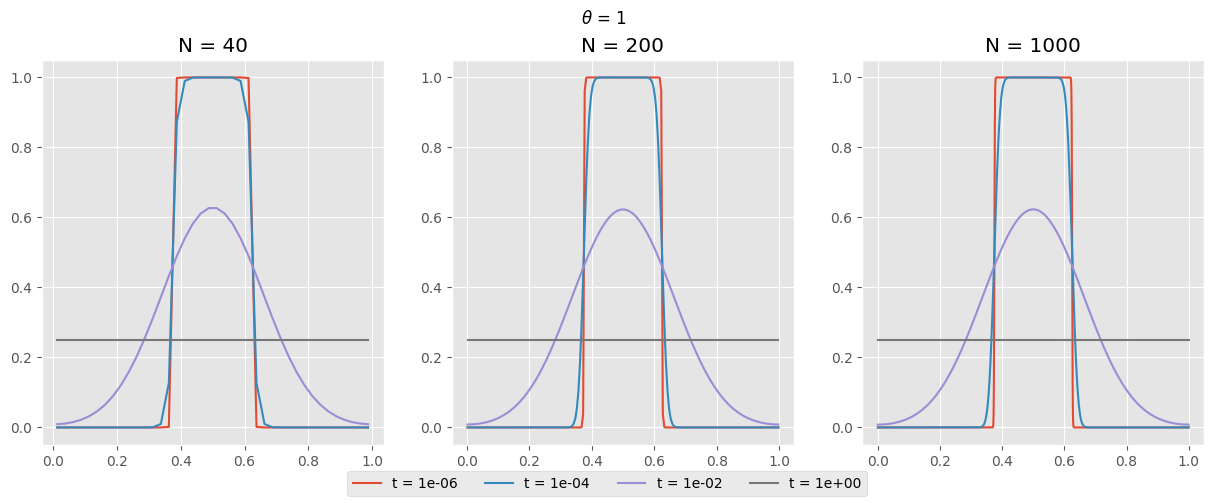

In [6]:
theta = 1

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(r'$\theta$ = {0}'.format(theta))

for i in range(3):
    N = 8 * 5**(i + 1)
    ax[i].set_title("N = {0}".format(N))

    for j in range(4):
        t = 10**(2 * j - 6)
        u_N, x = theta_schema(L, N, t, theta, u_zero)
        ax[i].plot(x, u_N, label="t = {0:1.0e}".format(t))

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.show()

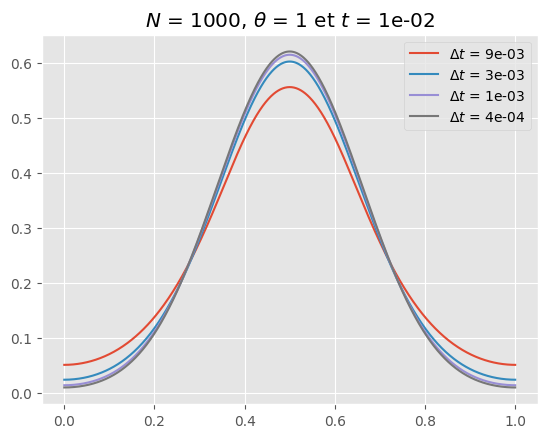

In [7]:
t = 10**-2
N = 1000

plt.title(r'$N$ = {0}, $\theta$ = {1} et $t$ = {2:1.0e}'.format(N, theta, t))

for j in range(4):
    Dt = t * 0.9**(10 * j + 1)
    u_N, x = theta_schema(L, N, t, theta, u_zero, dt_=Dt)
    plt.plot(x, u_N, label=r'$\Delta t$ = {0:1.0e}'.format(Dt))

plt.legend()
plt.show()

- Nous observons des résultats similaires à ceux obtenus lorsque $N = 1000$ à la question 4.

    – Plus $\theta$ est proche de 1, meilleure est la convergence du schéma.

    – Plus $\Delta t$ est proche de 0, meilleure est la convergence du schéma.

    – Il en va de même lorsque $\Delta x$ s'approche de 0.

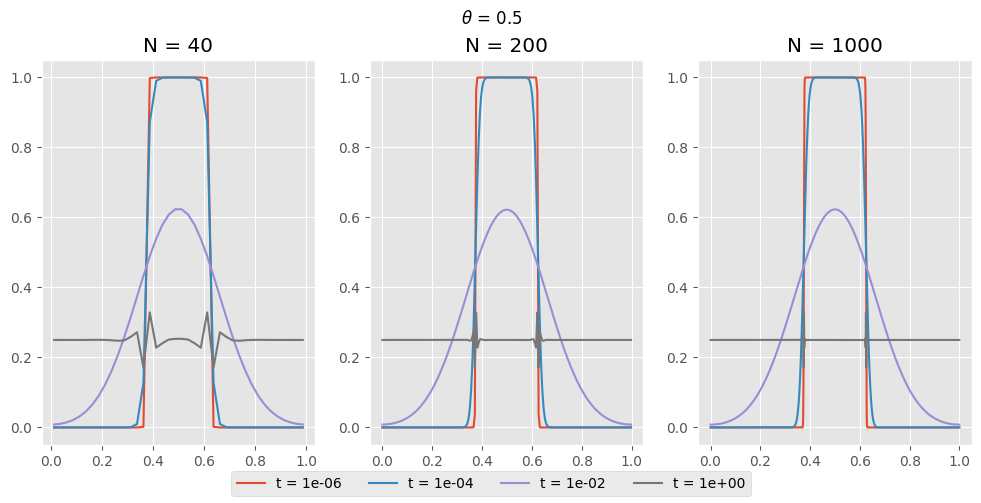

In [8]:
theta = .5

fig, ax = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle(r'$\theta$ = {0}'.format(theta))

for i in range(3):
    N = 8 * 5**(i + 1)
    ax[i].set_title("N = {0}".format(N))

    for j in range(4):
        t = 10**(2 * j - 6)
        u_N, x = theta_schema(L, N, t, theta, u_zero)
        ax[i].plot(x, u_N, label="t = {0:1.0e}".format(t))

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.show()

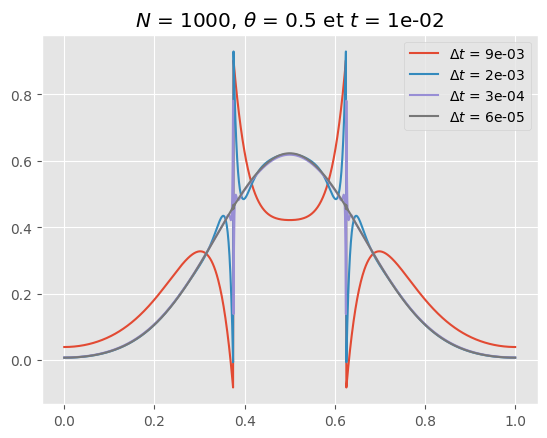

In [9]:
t = 10**-2
N = 1000

plt.title(r'$N$ = {0}, $\theta$ = {1} et $t$ = {2:1.0e}'.format(N, theta, t))

for j in range(4):
    Dt = t * 0.9**(16 * j + 1)
    u_N, x = theta_schema(L, N, t, theta, u_zero, dt_=Dt)
    plt.plot(x, u_N, label=r'$\Delta t$ = {0:1.0e}'.format(Dt))

plt.legend()
plt.show()

- Nous observons qu'il subsiste une instabilité aux limites, lorsque $\theta = 1/2$ et que $\Delta t$ n'est pas assez petit ou que $N$.

  En particulier pour les petites valeurs de $t$.

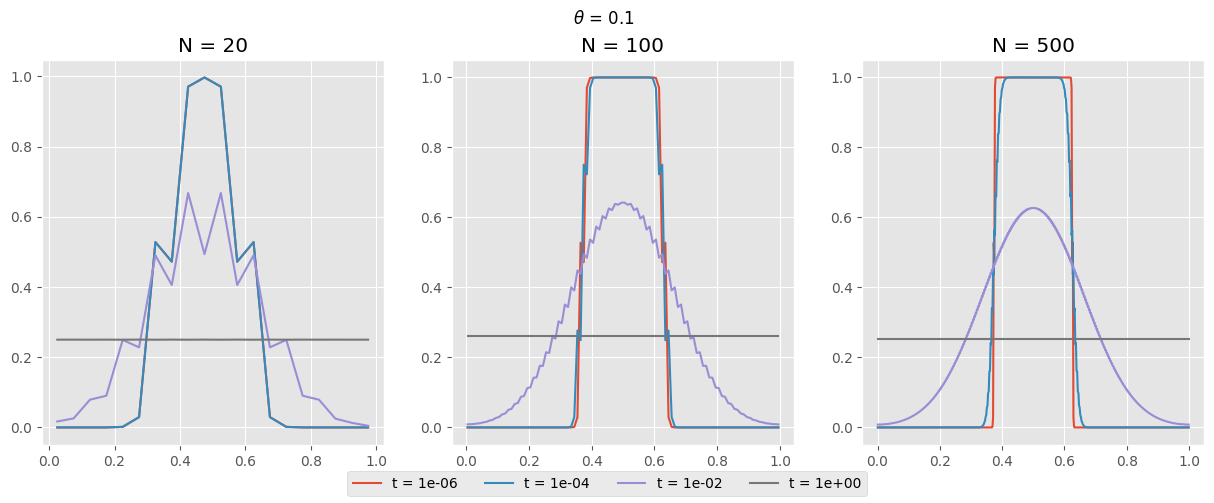

In [10]:
theta = 0.1

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle(r'$\theta$ = {0}'.format(theta))

for i in range(3):
    N = 4 * 5**(i+1)
    ax[i].set_title("N = {0}".format(N))

    for j in range(4):
        t = 10**(2*j-6)
        u_N, x = theta_schema(L, N, t, theta, u_zero)
        ax[i].plot(x, u_N, label="t = {0:1.0e}".format(t))

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.show()

- Lorsque $\theta < 1/2$ et que $\Delta t = (\Delta x)^2 / (2 - 4 \theta)$, le schéma converge bien.

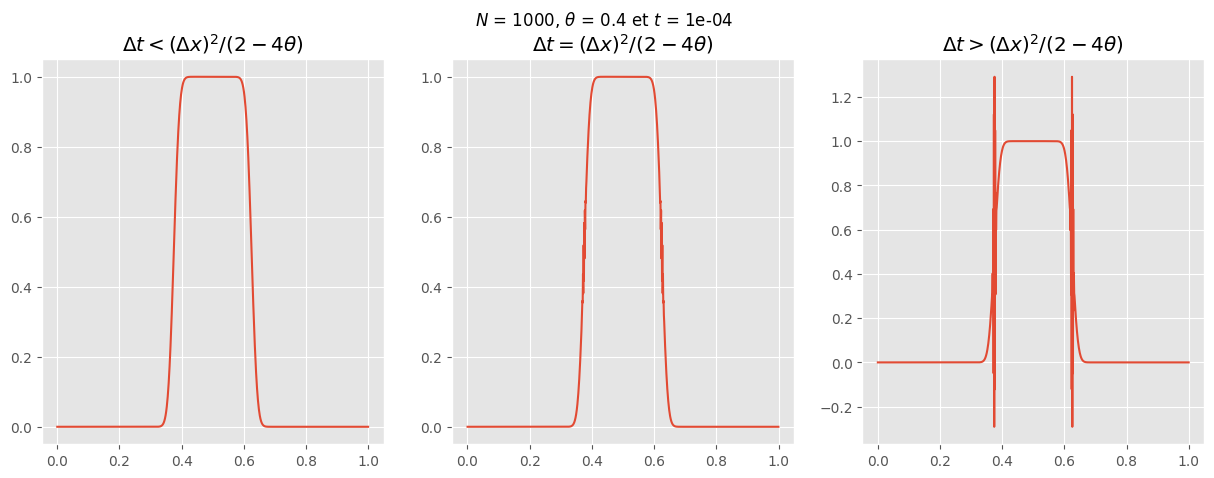

In [11]:
theta = 0.4
t = 10**-4
N = 1000

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle(r'$N$ = {0}, $\theta$ = {1} et $t$ = {2:1.0e}'.format(N, theta, t))

titles = [r'$\Delta t < (\Delta x)^2 / (2 - 4 \theta)$',
          r'$\Delta t = (\Delta x)^2 / (2 - 4 \theta)$',
          r'$\Delta t > (\Delta x)^2 / (2 - 4 \theta)$']

for i in range(-1, 2):
    Dt = calcul_pas_dt(t, L/N, theta) * (1 + i * 0.2)
    ax[i+1].set_title(titles[i+1])
    u_N, x = theta_schema(L, N, t, theta, u_zero, dt_=Dt)
    ax[i+1].plot(x, u_N)

plt.show()

- Si $\theta < 1/2$ le schéma ne converge pas lorsque $\Delta t > (\Delta x)^2 / (2 − 4 \theta)$.

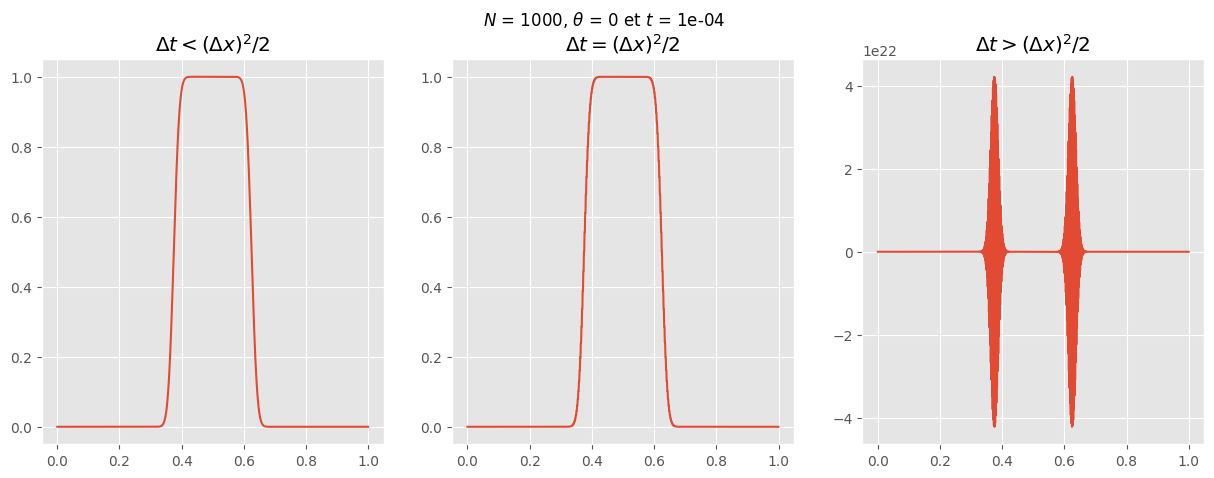

In [12]:
theta = 0
t = 10**-4
N = 1000

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle(r'$N$ = {0}, $\theta$ = {1} et $t$ = {2:1.0e}'.format(N, theta, t))

titles = [r'$\Delta t < (\Delta x)^2 / 2$',
          r'$\Delta t = (\Delta x)^2 / 2$',
          r'$\Delta t > (\Delta x)^2 / 2$']

for i in range(-1, 2):
    Dt = calcul_pas_dt(t, L/N, theta) * (1 + i * 0.2)
    ax[i+1].set_title(titles[i+1])
    u_N, x = theta_schema(L, N, t, theta, u_zero, dt_=Dt)
    ax[i+1].plot(x, u_N)

plt.show()

- Lorsque $\theta = 0$ et que la condition CFL n'est pas respectée, le schéma diverge encore plus.